<a href="https://colab.research.google.com/github/vafter341ew/COLAB/blob/main/act1_1_introduction_to_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import polars as pl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

### Supervised VS. Unsupervised learning

- **supervised learning** involves building models to predict a known quantity/target, but
- **unsupervised learning** involves finding patterns without known target.

### What is regression and classification?

In a machine learning context,

- a **regression** involves predicting a numeric target, and
- **classification** involves prediction a label.

## Regression Example 1 - Cereal moisture content

We will approach this problem like a statistician interested in using the sample to perform inference for a population of similar cereal boxes.

### Step 1 - Explore the data

#### Loading the data into `polars`

In [54]:
(cereal :=
 pl.read_csv("./sample_data/cereal.csv")
 )

Time on Shelf (days),Moisture (mg)
i64,f64
0,2.9
6,3.2
10,3.5
16,3.6
24,3.9
30,4.2
37,4.6


#### Cleaning up the column names

In [55]:
cereal.columns

['Time on Shelf (days)', 'Moisture (mg)']

In [56]:
(short_names :=
 {'Time on Shelf (days)': 'time',
  'Moisture (mg)':'moisture',
 }
 )

{'Time on Shelf (days)': 'time', 'Moisture (mg)': 'moisture'}

In [57]:
(cereal :=
 cereal
 .rename(short_names)
)

time,moisture
i64,f64
0,2.9
6,3.2
10,3.5
16,3.6
24,3.9
30,4.2
37,4.6


#### Visualizing the relationship

<Axes: xlabel='time', ylabel='moisture'>

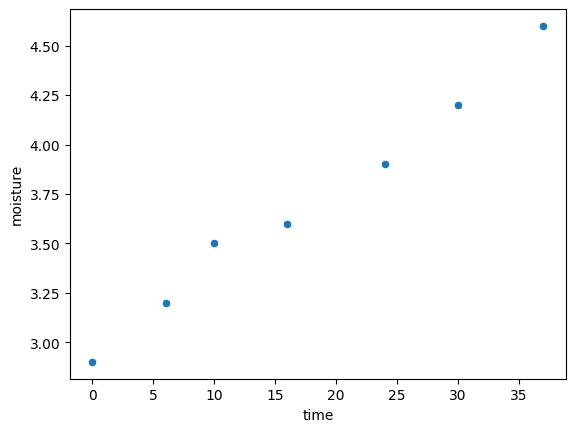

In [58]:
# Plot with seaborn
sns.scatterplot(data=cereal, x="time", y="moisture")

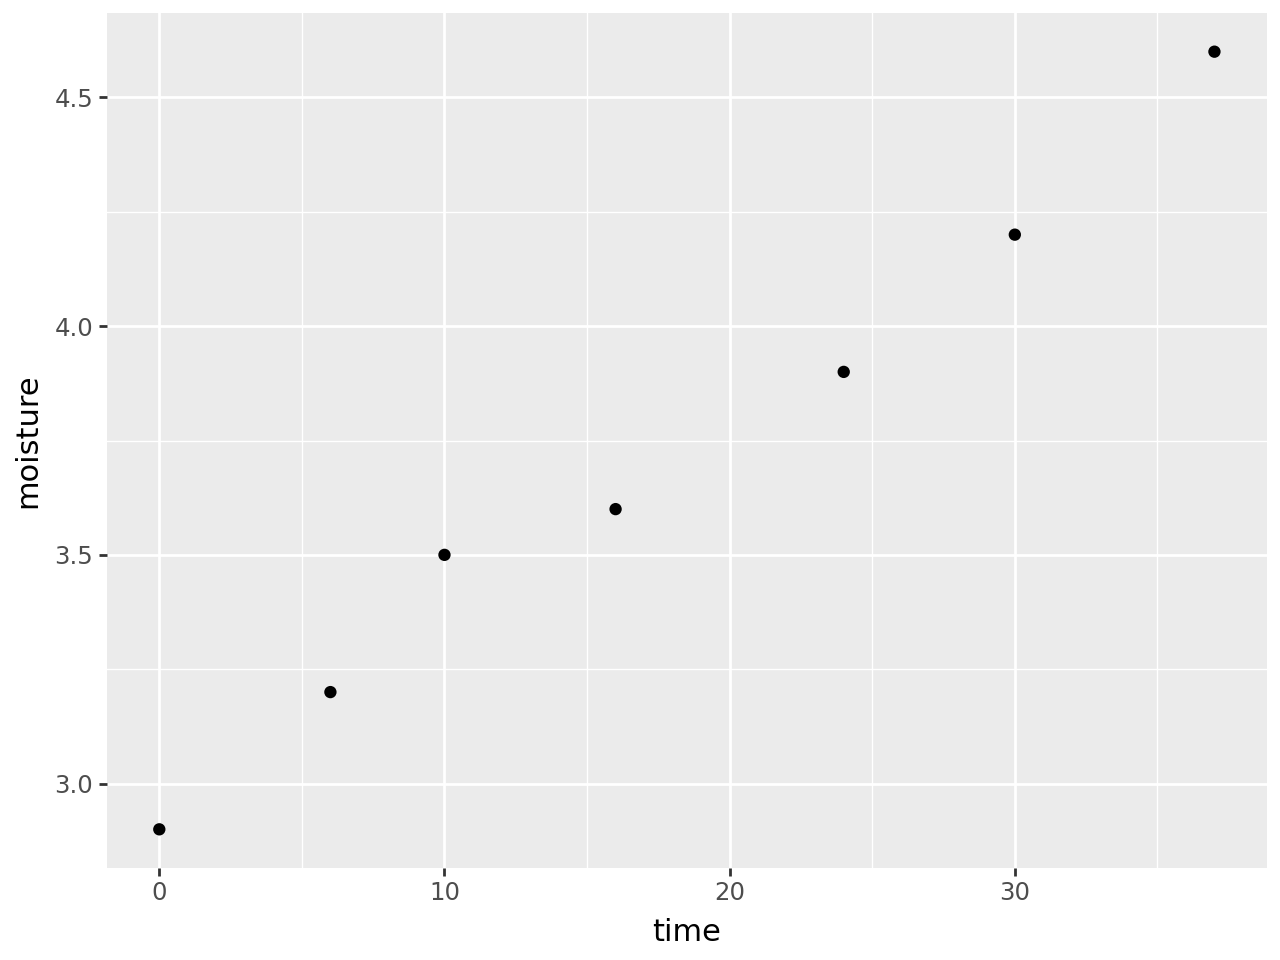

In [59]:
from plotnine import ggplot, aes, geom_point

(
    ggplot(cereal)
    + aes(x="time", y="moisture")
    + geom_point()
)

### Step 2 - Fit a model

#### Extracting the target vector and feature matrix

In [60]:
(y :=
 cereal
 .get_column("moisture")
 .to_numpy()
 )

array([2.9, 3.2, 3.5, 3.6, 3.9, 4.2, 4.6])

In [61]:
(X :=
 cereal
 .drop("moisture")
 .to_pandas()
)

,time
0,0
1,6
2,10
3,16
4,24
5,30
6,37


In [62]:
# statsmodels requires us to add the intercept ourselves
(X_w_int:=
 sm.add_constant(X)
)


,const,time
0,1.0,0
1,1.0,6
2,1.0,10
3,1.0,16
4,1.0,24
5,1.0,30
6,1.0,37


#### Fit the model

In [63]:
model = sm.OLS(y,X_w_int, hasconst=True)
results = model.fit()
results.params


,0
const,2.940438
time,0.043227


#### Residual analysis

<Axes: >

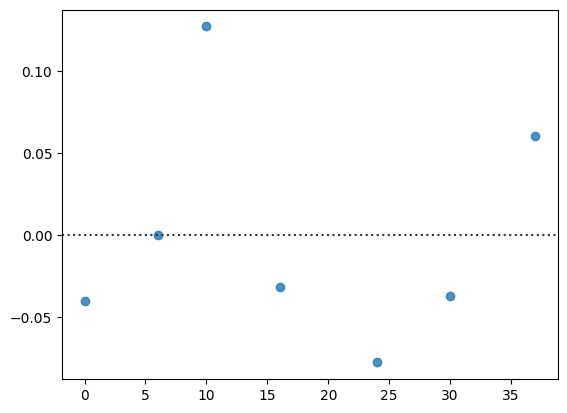

In [64]:
sns.residplot(data=cereal, x="time", y="moisture")

### Step 3 - Perform Inference

#### The F test

In [65]:
results.f_test(results.params)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=3364.0629032671477, p=2.88244740258948e-08, df_denom=5, df_num=1>

<font color="orange"> There is strong evidence that the population linear model performed better than a flat, naive model (F = 3364.1, p = 0) </font>

#### The t-test for the slope

In [66]:
results.t_test(results.params)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             8.6480      0.149     58.001      0.000       8.265       9.031

<font color="orange"> There is strong evidence that the slope of the population line is non-zero. (F = 3364.1, p = 0) </font>


#### Find and interpret CI for each parameter

In [67]:
results.conf_int()


,0,1
const,2.810017,3.070859
time,0.037162,0.049292


<font color="orange"> We are 95% confident that
- <b> Intercept.</b> The moisture content of all new cereal box was between 2.81 and 3.07 mg, on average.
- <b> Slope.</b> Each additional day on the shelf is associated with an increase of between 0.037 and 0.049 mg of moisture, on average.
</font>


## <font color='red'> Exercise 1.1.1 </font>

The dataset `alligator.csv` contains information on the weight and length of a sample of alligators.

**Tasks.**
1. Visualize the relationship,
2. Fit a linear/simple model,
3. Comment on the residuals,
4. Perform some inference (F, t, CI).

<Axes: xlabel='length', ylabel='weight'>

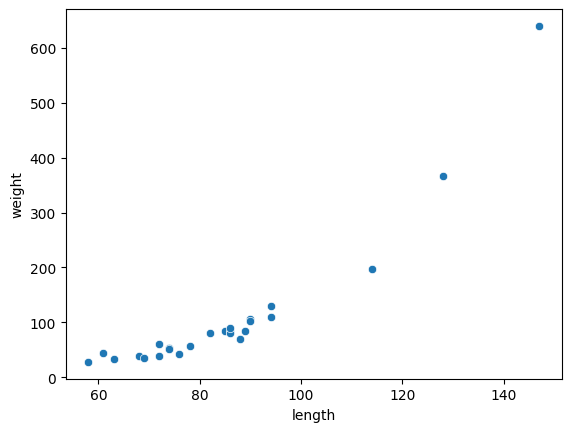

In [107]:
import polars as pl

alligator = pl.read_csv("./sample_data/alligator_length_weight.csv")

alligator_short_names = {
    'Length (in)': 'length',
    'Weight (lb)': 'weight'
}

(alligator :=
 alligator
 .rename(alligator_short_names)
)
sns.scatterplot(data=alligator, x="length", y="weight")

In [108]:
import statsmodels.api as sm

X = alligator.get_column("length").to_numpy().reshape(-1, 1)

y = alligator.get_column("weight").to_numpy()

X_w_int = sm.add_constant(X)
model = sm.OLS(y, X_w_int, hasconst=True)

results = model.fit()

print("Model Parameters:")
print(results.params)


Model Parameters:
[-393.26402468    5.90235434]


<Axes: >

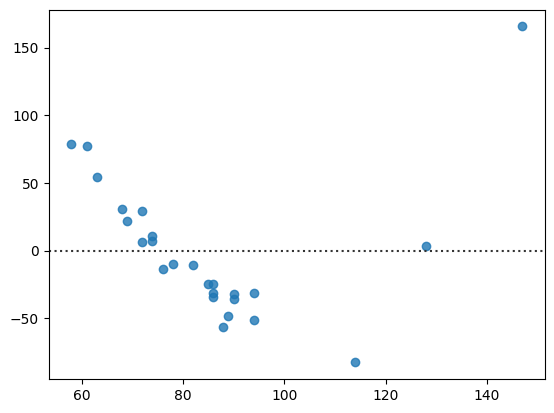

In [109]:
sns.residplot(data=alligator, x="length", y="weight")

In [110]:
results.f_test(results.params)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=68.45548743920165, p=2.3963388932511302e-08, df_denom=23, df_num=1>

\<font color="orange">
We have an f value of 68.456, which has a tiny p-value > 0.0001. This means we have clear evidence that this fitted model is so much better than the generic population model
</font>

## Example 2 - Predicting the median housing price

We will use the California housing price data (included with Colab) to illustrate the ML approach to a regression problem, that is focusing on the predictive power of the model.

**Note.** The data has been split into a training and test set to allow for proper validation of the model performance.

In [69]:
(cali_housing_train :=
 pl.read_csv("./sample_data/california_housing_train.csv")
)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
f64,f64,f64,f64,f64,f64,f64,f64,f64
-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
-114.47,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.82,80100.0
-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.925,65500.0
…,…,…,…,…,…,…,…,…
-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
-124.3,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0


<Axes: xlabel='median_income', ylabel='median_house_value'>

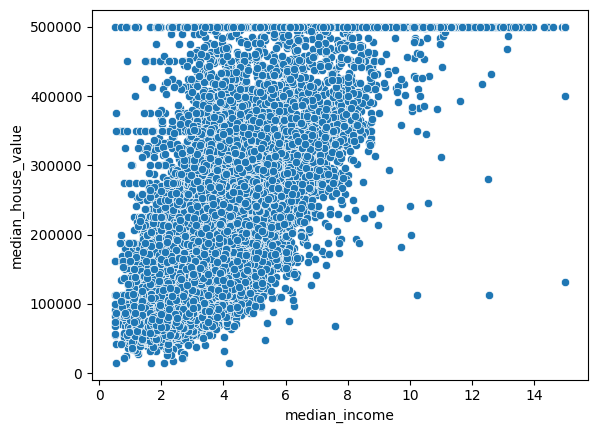

In [70]:
sns.scatterplot(data=cali_housing_train, x="median_income", y="median_house_value")

In [71]:
(y :=
 cali_housing_train
 .get_column("median_house_value")
 .to_numpy()
 )

array([ 66900.,  80100.,  85700., ..., 103600.,  85800.,  94600.])

In [72]:
(X :=
 cali_housing_train
 .select('median_income')
 .to_pandas()
)

,median_income
0,1.4936
1,1.8200
2,1.6509
3,3.1917
4,1.9250
...,...
16995,2.3571
16996,2.5179
16997,3.0313
16998,1.9797


### Model 1 - Simple Linear Model using Median Income

In [73]:
from sklearn.linear_model import LinearRegression
(model := LinearRegression())

LinearRegression()

In [74]:
model.fit(X,y)

LinearRegression()

In [75]:
model.intercept_, model.coef_

(np.float64(43980.62815629659), array([42054.07487406]))

<Axes: >

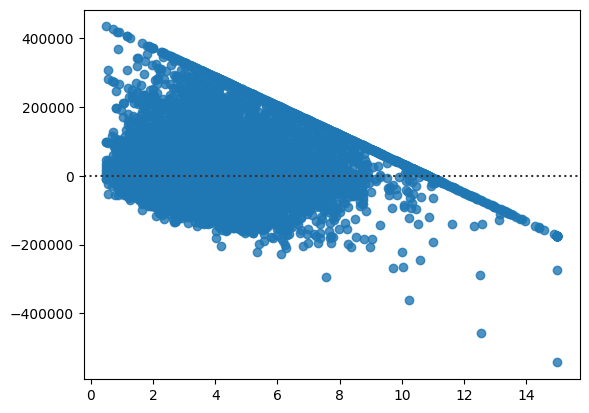

In [76]:
sns.residplot(data=cali_housing_train, x="median_income", y="median_house_value")

In [77]:
cali_housing_test = pl.read_csv("./sample_data/california_housing_test.csv")
(X_test :=
 cali_housing_test
 .select('median_income')
 .to_pandas()
)

,median_income
0,6.6085
1,3.5990
2,5.7934
3,6.1359
4,2.9375
...,...
2995,1.1790
2996,3.3906
2997,2.2895
2998,3.2708


In [78]:
(y_test :=
 cali_housing_test
 .get_column("median_house_value")
 .to_numpy()
 )


array([344700., 176500., 270500., ...,  62000., 162500., 500001.])

In [79]:
(y_pred :=
 model.predict(X_test)
)

array([321894.9819615 , 195333.24362802, 287616.70553165, ...,
       140263.43258045, 181531.09625436, 403997.15233812])

In [80]:
from sklearn.metrics import mean_squared_error

(mspe :=
 mean_squared_error(y_test, y_pred)
)

7009935982.6736

In [81]:
mspe**0.5

83725.36045114168

<font color="orange">
The simple linear regression model had an "average" error of $83,725 when using the median income to predict the median housing price.
</font>

### Model 2 - Quadratic Model using Median Income

In [82]:
from sklearn.preprocessing import PolynomialFeatures

quad = PolynomialFeatures(2)
quad.fit_transform(X)

array([[1.        , 1.4936    , 2.23084096],
       [1.        , 1.82      , 3.3124    ],
       [1.        , 1.6509    , 2.72547081],
       ...,
       [1.        , 3.0313    , 9.18877969],
       [1.        , 1.9797    , 3.91921209],
       [1.        , 3.0147    , 9.08841609]])

In [83]:
# Notice that the previous transformation added an intercept,
# so we need to turn it off in the model.
quad_model = LinearRegression(fit_intercept=False)
quad_model.fit(quad.fit_transform(X),y)

LinearRegression(fit_intercept=False)

In [84]:
quad_model.coef_

array([18920.20470644, 53649.40406041, -1066.65146247])

In [85]:
(y_pred_quad :=
 quad_model.predict(quad.fit_transform(X_test))
)

array([326879.19837494, 198188.28579016, 293932.12336525, ...,
       136159.33073361, 182985.4966811 , 400030.02084549])

In [86]:
mspe_quad = mean_squared_error(y_test, y_pred_quad)
mspe_quad**0.5

83435.31698045651

<font color="orange">
The quadratic linear regression model had an "average" error of $83,435 when using the median income to predict the median housing price, performing marginally better than the linear model.
</font>


## <font color='red'> Exercise 1.1.2 </font>

The dataset `alligator.csv` contains information on the weight and length of a sample of alligators.

**Tasks.**
1. Use `train_test_split` to split  `X`, and `y` into a training and validation set, with 30% of the data set aside for testing.
2. Fit models of with the following degrees: 1, 2, 3, 4
3. Estimate the MSPE for each model and identify the best model.


In [90]:
alligator=pl.read_csv("./sample_data/alligator_length_weight.csv")
alligator.head()

Length (in),Weight (lb)
i64,i64
58,28
61,44
63,33
68,39
69,36


In [97]:
from sklearn.model_selection import train_test_split

X = alligator.get_column("Length (in)").to_numpy().reshape(-1, 1)
y = alligator.get_column("Weight (lb)").to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Training set size: 17 samples
Test set size: 8 samples


In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

rmspe_results = {}

for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree, include_bias=True)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mspe = mean_squared_error(y_test, y_pred)
    rmspe_results[f'Degree {degree}'] = np.sqrt(mspe)

for degree_str, rmspe_value in rmspe_results.items():
    print(f"{degree_str}: {rmspe_value:.2f}")

Degree 1: 54.51
Degree 2: 13.57
Degree 3: 20.10
Degree 4: 24.36


## <font color='orange'> Exercise 1.1.2 Findings </font>

Based on the calculated Root Mean Squared Prediction Error (RMSPE):

*   **Degree 1 (Linear Model):** 54.51
*   **Degree 2 (Quadratic Model):** 13.57
*   **Degree 3 (Cubic Model):** 20.10
*   **Degree 4 (Quartic Model):** 24.36

The model with the lowest RMSPE is the best performing model. Please replace the `[RMSPE Value]` placeholders above with the actual values from the execution output and interpret which degree model is the best. Generally, a lower RMSPE indicates a better fit of the model to unseen data.